# FLIGHT DELAY PREDICTION

# 1.Data Collection

# 2.Data Preprocessing

 #### Importing the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 #### Importing the dataset

In [10]:
dataset=pd.read_csv(r"C:\Users\Likitha Regatte\Downloads\flightdelay.csv")

In [11]:
dataset.head()

,Year,Month,Date,Flight_Number,Actual_DepTime,Scheduled_DepTime,Actual_ArrTime,Scheduled_ArrTime,AirTime,ArrivalDelay,DepDelay,Origin,Destination,Distance,Delay
0,2018,1,1.0,1321,2003,1955,2211.0,2225,116.0,-14.0,8,IAD,TPA,810,NO
1,2018,1,2.0,98,754,735,1002.0,1000,113.0,2.0,19,IAD,TPA,810,NO
2,2018,1,3.0,2336,628,620,804.0,750,76.0,14.0,8,IND,BWI,515,NO
3,2018,1,4.0,840,1829,1755,1959.0,1925,77.0,34.0,34,IND,BWI,515,YES
4,2018,1,5.0,258,1940,1915,2121.0,2110,87.0,11.0,25,IND,JAX,688,NO


#### Data Visualization

Text(0.5, 1.0, 'Flight Delay Prediction')

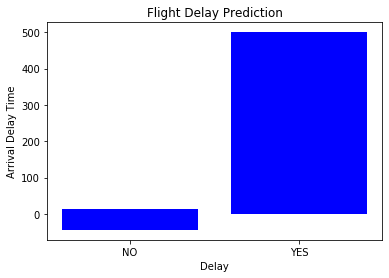

In [22]:
plt.bar(dataset["Delay"],dataset["ArrivalDelay"],color='b')
plt.xlabel("Delay")
plt.ylabel("Arrival Delay Time")
plt.title("Flight Delay Prediction")

#### Taking care of missing data

In [23]:
dataset.isnull().any()

Year                 False
Month                False
Date                  True
Flight_Number        False
Actual_DepTime       False
Scheduled_DepTime    False
Actual_ArrTime        True
Scheduled_ArrTime    False
AirTime               True
ArrivalDelay          True
DepDelay             False
Origin               False
Destination          False
Distance             False
Delay                False
dtype: bool

In [24]:
dataset["Date"].fillna(dataset["Date"].mode()[0],inplace=True)
dataset["Actual_ArrTime"].fillna(dataset["Actual_ArrTime"].median(),inplace=True)
dataset["AirTime"].fillna(dataset["AirTime"].mean(),inplace=True)
dataset["ArrivalDelay"].fillna(dataset["ArrivalDelay"].mean(),inplace=True)

In [25]:
dataset.isnull().any()

Year                 False
Month                False
Date                 False
Flight_Number        False
Actual_DepTime       False
Scheduled_DepTime    False
Actual_ArrTime       False
Scheduled_ArrTime    False
AirTime              False
ArrivalDelay         False
DepDelay             False
Origin               False
Destination          False
Distance             False
Delay                False
dtype: bool

#### Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Origin"]=le.fit_transform(dataset["Origin"])
dataset["Destination"]=le.fit_transform(dataset["Destination"])
dataset["Delay"]=le.fit_transform(dataset["Delay"])

In [31]:
dataset["Origin"].unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [32]:
dataset["Destination"].unique()

array([61, 10, 26, 27, 33, 34, 45, 18, 42, 50, 20,  5,  6, 23, 44,  0,  1,
        2,  3,  4,  7,  8,  9, 11, 12, 15, 17, 19, 22, 24, 28, 29, 30, 31,
       32, 35, 36, 37, 38, 39, 40, 41, 43, 46, 47, 48, 49, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 62, 63, 14, 16, 25, 21, 13])

In [33]:
dataset["Delay"].unique()

array([0, 1])

#### Splitting input,output data  & One Hot Encoding

In [39]:
x=dataset.iloc[:,0:14].values
y=dataset.iloc[:,14:15].values

In [40]:
print(x.shape)
print(y.shape)

(15000, 14)
(15000, 1)


In [41]:
dataset.head(1)

,Year,Month,Date,Flight_Number,Actual_DepTime,Scheduled_DepTime,Actual_ArrTime,Scheduled_ArrTime,AirTime,ArrivalDelay,DepDelay,Origin,Destination,Distance,Delay
0,2018,1,1.0,1321,2003,1955,2211.0,2225,116.0,-14.0,8,22,61,810,0


In [49]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
a=one.fit_transform(x[:,11:12]).toarray()
b=one.fit_transform(x[:,12:13]).toarray()
x=np.delete(x,[11,12],axis=1)
x=np.concatenate((b,a,x),axis=1)

In [50]:
x.shape

(15000, 140)

#### Splitting Data into Train and Test

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [53]:
x_train.shape

(10500, 140)

In [54]:
x_test.shape

(4500, 140)

#### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# 3.Model Building

### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=43)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

In [57]:
y_pred=dtc.predict(x_test)

In [58]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [59]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [62]:
from sklearn.metrics import accuracy_score
flight_Delay_accuracy=accuracy_score(y_test,y_pred)

In [63]:
flight_Delay_accuracy

0.9728888888888889

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [65]:
cm

array([[1972,   13],
       [ 109, 2406]], dtype=int64)

In [66]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

In [67]:
threshold

array([2, 1, 0])

In [68]:
fpr

array([0.        , 0.00654912, 1.        ])

In [69]:
tpr

array([0.        , 0.95666004, 1.        ])

Text(0.5, 0, 'fpr')

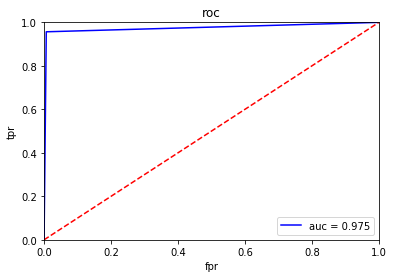

In [71]:
plt.title("roc")
plt.plot(fpr,tpr,'b',label = 'auc = %0.3f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')

##### Let's compare this algorithm with logistic regression

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred2=lr.predict(x_test)

In [76]:
log_accuracy=accuracy_score(y_test,y_pred2)

In [77]:
log_accuracy

0.9693333333333334

In [78]:
cm2=confusion_matrix(y_test,y_pred2)

In [79]:
cm2

array([[1968,   17],
       [ 121, 2394]], dtype=int64)

In [80]:
fpr2,tpr2,threshold=metrics.roc_curve(y_test,y_pred2)
roc_auc2=metrics.auc(fpr2,tpr2)

Text(0.5, 0, 'False positive rate (fpr2)')

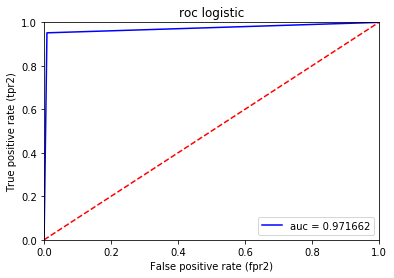

In [81]:
plt.title("roc logistic")
plt.plot(fpr2,tpr2,'b',label='auc = %f'%roc_auc2)
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate (tpr2)')
plt.xlabel('False positive rate (fpr2)')

# Evaluation

#### Comparing both the accuracy and roc_auc curve of the models
#### Decisiontree=97.22  , auc=0.975
#### LogisticRegression=96.93  ,auc=0.971
#### There is just a  slight difference between them,so we will consider Decision Tree Classifier